In [2]:
%config Completer.use_jedi = False

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [10]:
#Import Libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
datasets = pd.read_csv("Network_Analysis/book1.csv")

In [8]:
datasets.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [12]:
#Create an Empty Graphs
Graphs_book1 = nx.Graph()

In [15]:
for _, edge in datasets.iterrows():
    Graphs_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

In [26]:
books = [Graphs_book1]
book_fnames = ['Network_Analysis/book2.csv', 'Network_Analysis/book3.csv', 'Network_Analysis/book4.csv', 'Network_Analysis/book5.csv']

In [27]:
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
        books.append(G_book)

In [30]:
degree_centerlity_book1 = nx.degree_centrality(books[0])
degree_centerlity_book5 = nx.degree_centrality(books[4])

In [31]:
sorted_degree_centrality_book1 = sorted(degree_centerlity_book1.items(), key = lambda x:x[1], reverse = True)[0:10]
sorted_degree_centrality_book5 = sorted(degree_centerlity_book5.items(), key = lambda x:x[1], reverse = True)[0:10]

In [32]:
print("Book 1", sorted_degree_centrality_book1)
print("Book 5", sorted_degree_centrality_book5)

Book 1 [('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)]
Book 5 [('Tyrion-Lannister', 0.2054263565891473), ('Joffrey-Baratheon', 0.1821705426356589), ('Cersei-Lannister', 0.16666666666666666), ('Arya-Stark', 0.15503875968992248), ('Stannis-Baratheon', 0.1434108527131783), ('Robb-Stark', 0.13565891472868216), ('Catelyn-Stark', 0.12790697674418605), ('Theon-Greyjoy', 0.12403100775193798), ('Renly-Baratheon', 0.12015503875968991), ('Bran-Stark', 0.11627906976744186)]


<AxesSubplot:>

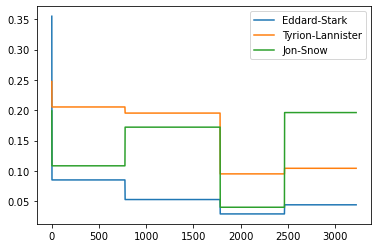

In [34]:
evol = [nx.degree_centrality(book) for book in books]
degree_evol_df = pd.DataFrame.from_records(evol)
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

In [35]:
degree_evol_df.head()

,Addam-Marbrand,Jaime-Lannister,Tywin-Lannister,Aegon-I-Targaryen,Daenerys-Targaryen,Eddard-Stark,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Bowen-Marsh,Chett,...,Yellow-Dick,Walda-Frey-(daughter-of-Merrett),Roose-Ryswell,Scar,Shrouded-Lord,Theomore,William-Foxglove,Willow-Witch-eye,Thistle,Wulfe
0,0.010753,0.155914,0.118280,0.010753,0.112903,0.354839,0.037634,0.053763,0.026882,0.016129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.081395,0.065891,0.019380,0.069767,0.085271,0.023256,0.015504,NaN,0.003876,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.081395,0.065891,0.019380,0.069767,0.085271,0.023256,0.015504,NaN,0.003876,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.081395,0.065891,0.019380,0.069767,0.085271,0.023256,0.015504,NaN,0.003876,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.081395,0.065891,0.019380,0.069767,0.085271,0.023256,0.015504,NaN,0.003876,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
evol = [nx.betweenness_centrality(book, weight = 'weight') for book in books]
betweensess_evol_df = pd.DataFrame.from_records(evol).fillna(0)

In [38]:
set_of_char = set()

for i in range(5):
    set_of_char |= set(list(betweensess_evol_df.T[i].sort_values(ascending = False)[0:4].index))

In [39]:
list_char = list(set_of_char)

<AxesSubplot:>

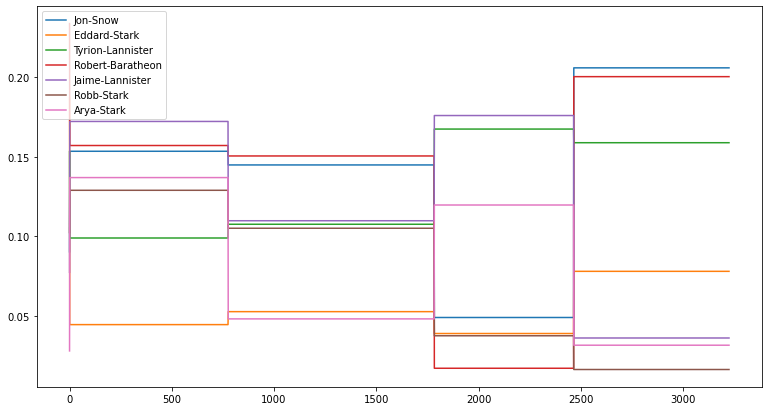

In [41]:
betweensess_evol_df[list_char].plot(figsize=(13, 7))

### Correlations

In [42]:
measures = [nx.pagerank(books[4]),
           nx.betweenness_centrality(books[4], weight = 'weight'),
           nx.degree_centrality(books[4])]

In [43]:
corr  = pd.DataFrame.from_records(measures)

In [44]:
corr.T.corr()

,0,1,2
0,1.000000,0.796071,0.946047
1,0.796071,1.000000,0.824200
2,0.946047,0.824200,1.000000


In [46]:
p_rank, b_cent, d_cent = corr.idxmax(axis = 1)

In [47]:
print(p_rank)
print(b_cent)
print(d_cent)

Tyrion-Lannister
Jaime-Lannister
Tyrion-Lannister
